#HW1 Data Mining

# Question 1

#1. Fetching the Dataset:

In [40]:
# Import necessary packages
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



# URL of the dataset
url = "/content/DRYAD_Data_Johansson_Updated2.1.csv"
df = pd.read_csv(url)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43606 entries, 0 to 43605
Data columns (total 65 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Yard                                                                  43606 non-null  int64  
 1   Date of Detection                                                     43606 non-null  object 
 2   Time of Detection                                                     43606 non-null  object 
 3   Species Detected                                                      43606 non-null  object 
 4   Number of the Species Detected in the Photo                           43606 non-null  int64  
 5   Sunset Time                                                           43606 non-null  object 
 6   Sunrise Time                                                          43606 non-null  object 


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#2. Creating dataset_2000_2359.csv and dataset_0000_0459.csv:

In [16]:

# Combine 'Date of Detection' and 'Time of Detection' into a single datetime column
df['Datetime of Detection'] = pd.to_datetime(df['Date of Detection'] + ' ' + df['Time of Detection'])

# Filtering and grouping for 2000 to 2359
df_2000_2359 = df[df['Datetime of Detection'].dt.time.between(pd.to_datetime('20:00').time(), pd.to_datetime('23:59').time())]
grouped_2000_2359 = df_2000_2359.groupby('Date of Detection')['Species Detected'].value_counts().unstack(fill_value=0)
binary_2000_2359 = grouped_2000_2359.applymap(lambda x: True if x > 0 else False)
binary_2000_2359.to_csv('dataset_2000_2359.csv')

# Filtering and grouping for 0000 to 0459
df_0000_0459 = df[df['Datetime of Detection'].dt.time.between(pd.to_datetime('00:00').time(), pd.to_datetime('04:59').time())]
grouped_0000_0459 = df_0000_0459.groupby('Date of Detection')['Species Detected'].value_counts().unstack(fill_value=0)
binary_0000_0459 = grouped_0000_0459.applymap(lambda x: True if x > 0 else False)
binary_0000_0459.to_csv('dataset_0000_0459.csv')


#3. Creating dataset_2000_2359_urban.csv and dataset_2000_2359_rural.csv:

In [18]:
# Step 3:
# Load the datasets created in step 2
df_2000_2359 = pd.read_csv('dataset_2000_2359.csv')
df_0000_0459 = pd.read_csv('dataset_0000_0459.csv')

# Merge with the original dataframe to get the 'Forest Cover within 1.5km of camera (km^2)' column
merged_2000_2359 = df_2000_2359.merge(df[['Date of Detection', 'Forest Cover within 1.5km of camera (km^2)']],
                                      on='Date of Detection',
                                      how='left').drop_duplicates()

merged_0000_0459 = df_0000_0459.merge(df[['Date of Detection', 'Forest Cover within 1.5km of camera (km^2)']],
                                      on='Date of Detection',
                                      how='left').drop_duplicates()

# Filter for Urban and Rural for the two time periods
urban_2000_2359 = merged_2000_2359[merged_2000_2359['Forest Cover within 1.5km of camera (km^2)'] < 0.30]
rural_2000_2359 = merged_2000_2359[merged_2000_2359['Forest Cover within 1.5km of camera (km^2)'] >= 0.30]

urban_0000_0459 = merged_0000_0459[merged_0000_0459['Forest Cover within 1.5km of camera (km^2)'] < 0.30]
rural_0000_0459 = merged_0000_0459[merged_0000_0459['Forest Cover within 1.5km of camera (km^2)'] >= 0.30]



#4. Creating dataset_0000_0459_urban.csv and dataset_0000_0459_rural.csv:

In [19]:
# Step 4:
# Save these filtered datasets to new CSV files
urban_2000_2359.drop('Forest Cover within 1.5km of camera (km^2)', axis=1).to_csv('dataset_2000_2359_urban.csv', index=False)
rural_2000_2359.drop('Forest Cover within 1.5km of camera (km^2)', axis=1).to_csv('dataset_2000_2359_rural.csv', index=False)

urban_0000_0459.drop('Forest Cover within 1.5km of camera (km^2)', axis=1).to_csv('dataset_0000_0459_urban.csv', index=False)
rural_0000_0459.drop('Forest Cover within 1.5km of camera (km^2)', axis=1).to_csv('dataset_0000_0459_rural.csv', index=False)


# Question 2

#Task 1: Top 5 species detected over the entire dataset

In [20]:
# Count the occurrence of each species and get the top 5
top_5_species = df['Species Detected'].value_counts().head(5)
print(top_5_species)


Gray Squirrel        7604
White-tailed Deer    6989
Bird                 6290
Raccoon              4854
Person               4203
Name: Species Detected, dtype: int64


#Task 2: Top 5 species most frequent at midnight (12am)

In [29]:
# Check the data type of 'Time of Detection'
print(df['Time of Detection'].dtype)

# Check some unique values in 'Time of Detection'
print(df['Time of Detection'].unique())


object
['13:32:00' '9:20:01' '9:48:05' ... '10:01:37 AM' '10:19:58 AM'
 '11:06:12 PM']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Filter the data for detections at midnight
midnight_data = df[df['Time of Detection'] == '00:00:00']

# Count the occurrence of each species at midnight and get the top 5
top_5_midnight_species = midnight_data['Species Detected'].value_counts().head(5)
print(top_5_midnight_species)


Series([], Name: Species Detected, dtype: int64)


In [31]:

# Convert 'Time of Detection' to datetime format
df['Time of Detection'] = pd.to_datetime(df['Time of Detection'])

# Set a time range around midnight
start_time = '00:00:00'
end_time = '00:59:00'

# Filter the data for detections around midnight
midnight_data = df[df['Time of Detection'].dt.time.between(pd.to_datetime(start_time).time(), pd.to_datetime(end_time).time())]

# Count the occurrence of each species around midnight and get the top 5
top_5_midnight_species = midnight_data['Species Detected'].value_counts().head(5)
print(top_5_midnight_species)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Raccoon                  487
White-tailed Deer        342
Nine-banded Armadillo    205
Virginia Opossum         155
45 Opossum               133
Name: Species Detected, dtype: int64


#Task 3: Heatmap of Species Detected vs Hour of Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


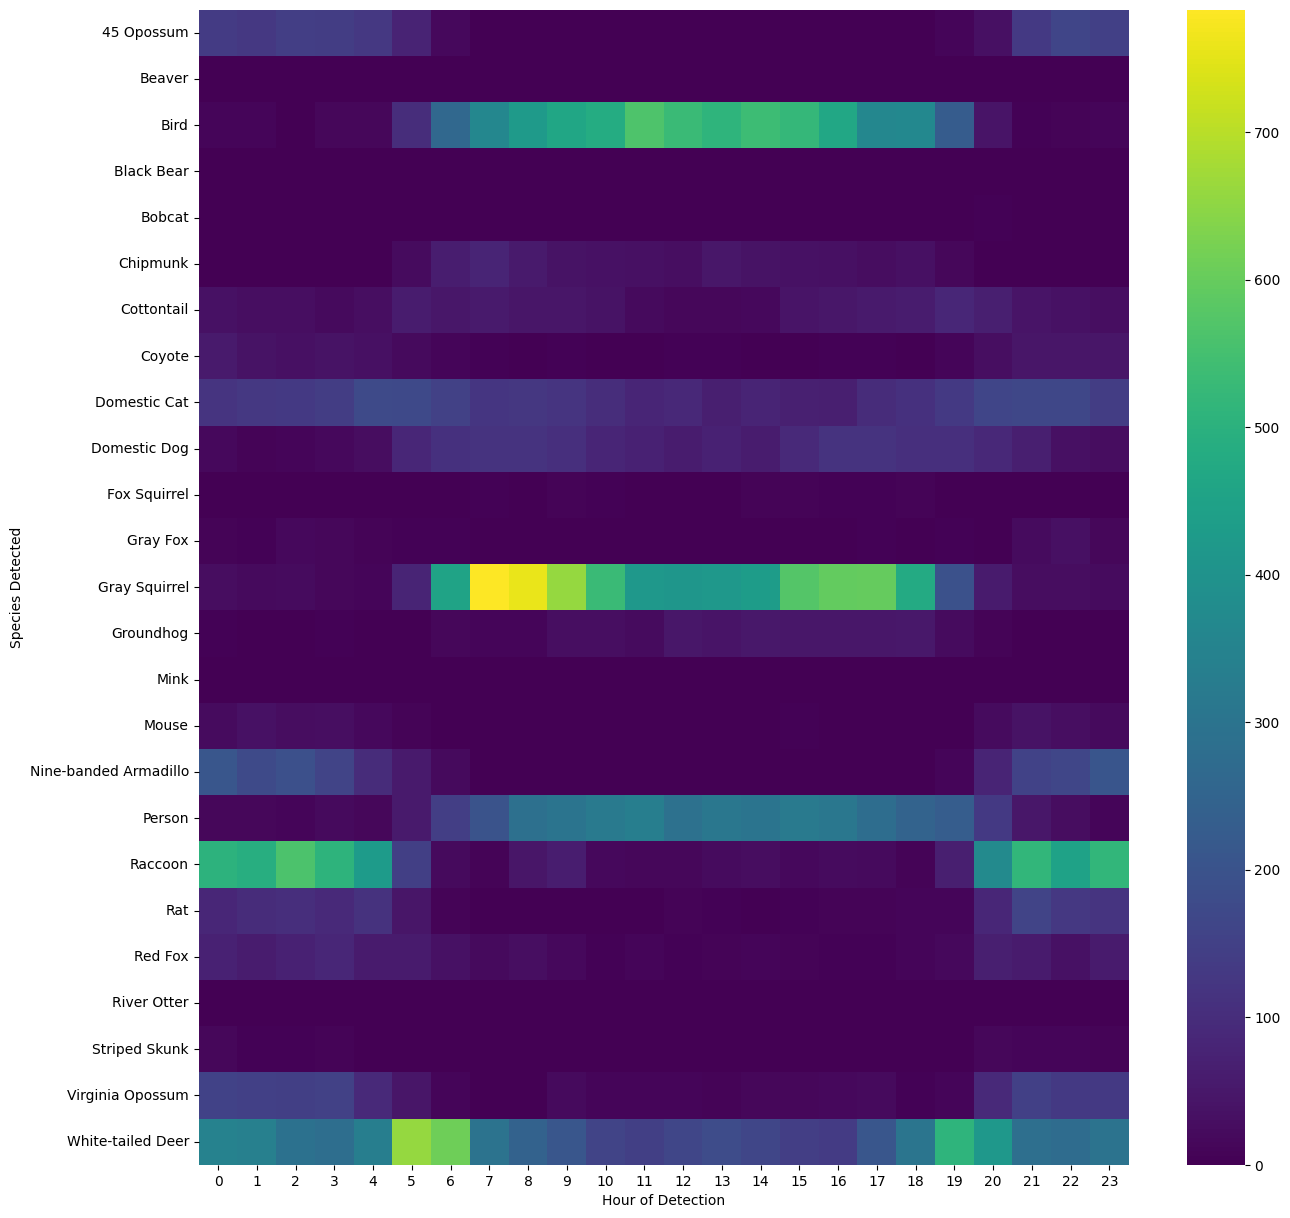

In [42]:
# Convert 'Time of Detection' to datetime format and extract the hour
df['Hour of Detection'] = pd.to_datetime(df['Time of Detection']).dt.hour

# Create a pivot table for the heatmap
heatmap_data = df.groupby(['Species Detected', 'Hour of Detection']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data, cmap='viridis')
plt.show()


#Task 4: Comparison of Heatmap outputs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


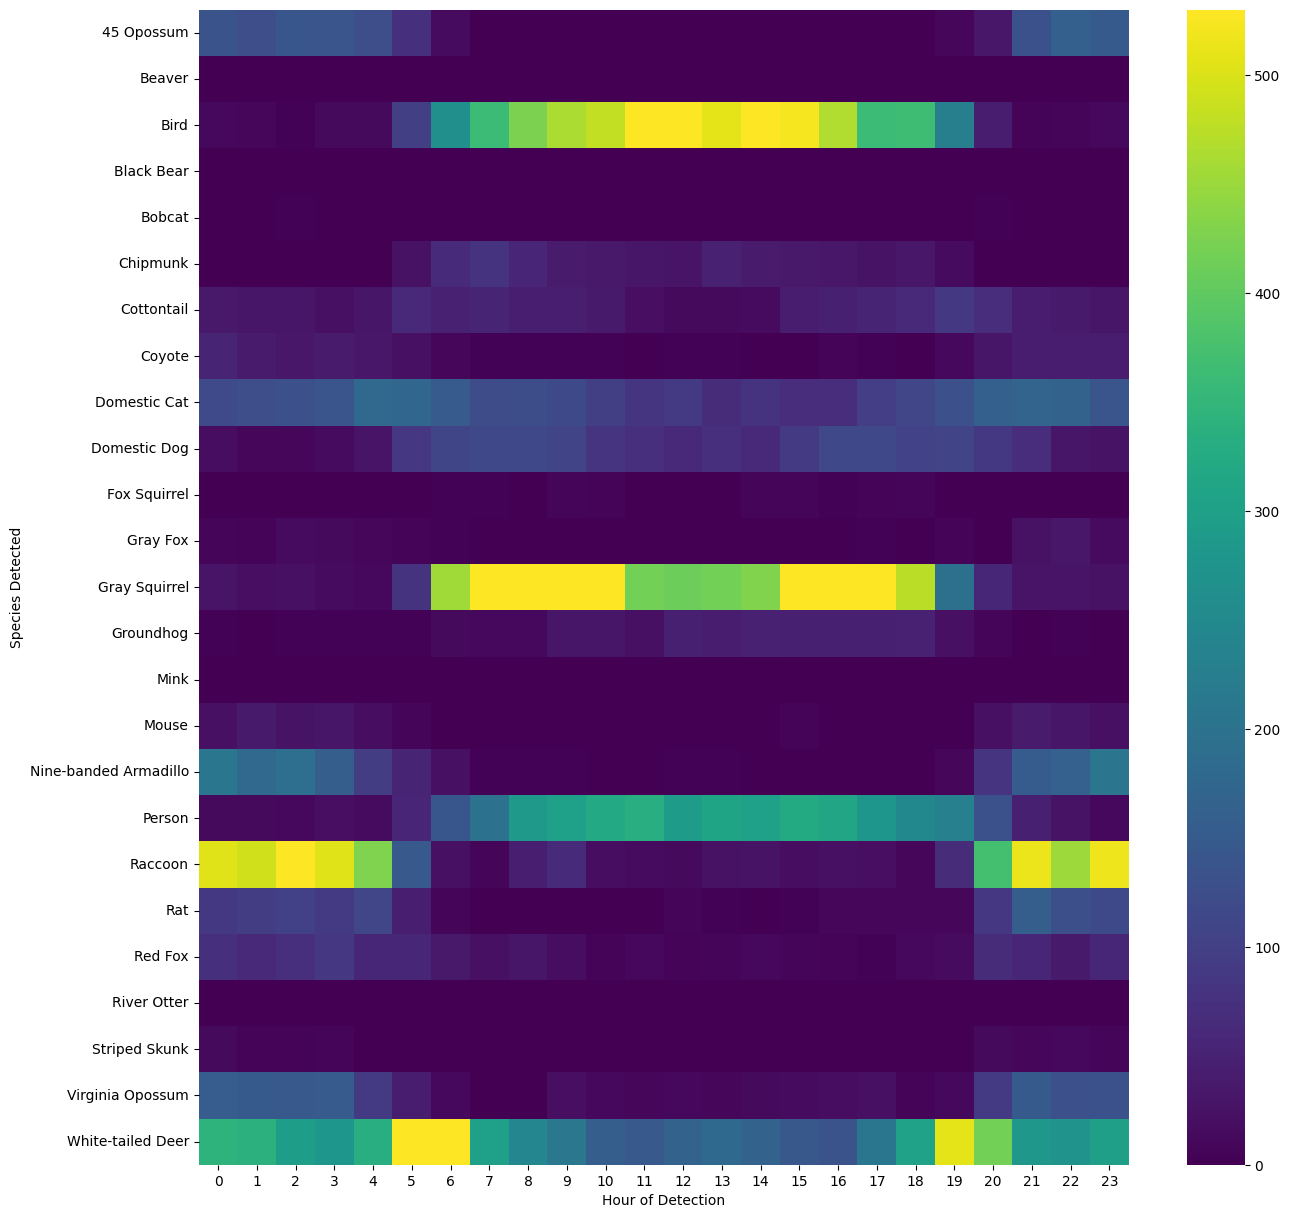

In [37]:
# Plot the heatmap with robust=True
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data, cmap='viridis', robust=True)
plt.show()


#Task 5: Compute the mode of all species in the dataset

In [24]:
species_mode = df['Species Detected'].mode()
print(species_mode)


0    Gray Squirrel
Name: Species Detected, dtype: object


#Task 6: Compute the probabilities of all species for urban and rural

In [25]:
# Define urban and rural data
urban_data = df[df['Forest Cover within 1.5km of camera (km^2)'] < 0.3]
rural_data = df[df['Forest Cover within 1.5km of camera (km^2)'] >= 0.3]

# Calculate species probabilities for urban and rural
urban_prob = urban_data['Species Detected'].value_counts(normalize=True)
rural_prob = rural_data['Species Detected'].value_counts(normalize=True)

# Combine into a DataFrame
prob_df = pd.DataFrame({'urban': urban_prob, 'rural': rural_prob}).fillna(0)
print(prob_df)


                          urban     rural
45 Opossum             0.032987  0.010553
Beaver                 0.000000  0.000116
Bird                   0.167167  0.051258
Black Bear             0.000029  0.000116
Bobcat                 0.000372  0.001392
Chipmunk               0.014922  0.006842
Cottontail             0.022211  0.020295
Coyote                 0.008547  0.015308
Domestic Cat           0.075265  0.029456
Domestic Dog           0.045393  0.011597
Fox Squirrel           0.001229  0.001624
Gray Fox               0.002201  0.008466
Gray Squirrel          0.171598  0.185666
Groundhog              0.012720  0.005914
Mink                   0.000114  0.000000
Mouse                  0.007318  0.000812
Nine-banded Armadillo  0.027470  0.066218
Person                 0.106337  0.056013
Raccoon                0.096590  0.171054
Rat                    0.025298  0.022614
Red Fox                0.022039  0.003827
River Otter            0.000029  0.000000
Striped Skunk          0.002087  0

# Question 3

#Task 1: Frequent Species in Early Evening regardless of Rural or Urban

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Filter data for early evening (9pm to 11:59pm)
df['Hour of Detection'] = pd.to_datetime(df['Time of Detection']).dt.hour
early_evening_data = df[df['Hour of Detection'].between(21, 23)]

# Create binary table
binary_early_evening = pd.pivot_table(early_evening_data, index='Date of Detection', columns='Species Detected', aggfunc='size', fill_value=0)
binary_early_evening = binary_early_evening.applymap(lambda x: 1 if x > 0 else 0)

# Apply apriori algorithm
frequent_itemsets_early = apriori(binary_early_evening, min_support=0.50, use_colnames=True)
print(frequent_itemsets_early)


     support                                           itemsets
0   0.634686                                     (Domestic Cat)
1   0.682657                            (Nine-banded Armadillo)
2   0.830258                                          (Raccoon)
3   0.715867                                (White-tailed Deer)
4   0.579336                            (Raccoon, Domestic Cat)
5   0.516605                  (White-tailed Deer, Domestic Cat)
6   0.653137                   (Raccoon, Nine-banded Armadillo)
7   0.594096         (White-tailed Deer, Nine-banded Armadillo)
8   0.686347                       (White-tailed Deer, Raccoon)
9   0.501845         (White-tailed Deer, Raccoon, Domestic Cat)
10  0.586716  (White-tailed Deer, Raccoon, Nine-banded Armad...


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#Task 2: Early Evening Frequent Patterns for Urban and Rural

In [27]:
# Filter data for urban and rural
urban_data_early = early_evening_data[early_evening_data['Forest Cover within 1.5km of camera (km^2)'] < 0.3]
rural_data_early = early_evening_data[early_evening_data['Forest Cover within 1.5km of camera (km^2)'] >= 0.3]

# Create binary tables
binary_urban_early = pd.pivot_table(urban_data_early, index='Date of Detection', columns='Species Detected', aggfunc='size', fill_value=0).applymap(lambda x: 1 if x > 0 else 0)
binary_rural_early = pd.pivot_table(rural_data_early, index='Date of Detection', columns='Species Detected', aggfunc='size', fill_value=0).applymap(lambda x: 1 if x > 0 else 0)

# Apply apriori algorithm
frequent_urban_early = apriori(binary_urban_early, min_support=0.50, use_colnames=True)
frequent_rural_early = apriori(binary_rural_early, min_support=0.50, use_colnames=True)

print(frequent_urban_early)
print(frequent_rural_early)


    support                          itemsets
0  0.631970                    (Domestic Cat)
1  0.579926           (Nine-banded Armadillo)
2  0.799257                         (Raccoon)
3  0.643123               (White-tailed Deer)
4  0.561338           (Raccoon, Domestic Cat)
5  0.542751  (Raccoon, Nine-banded Armadillo)
6  0.598513      (White-tailed Deer, Raccoon)
    support                 itemsets
0  0.528571  (Nine-banded Armadillo)
1  0.723810                (Raccoon)
2  0.552381      (White-tailed Deer)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#Task 3: Late Evening Frequent Patterns for Urban and Rural

In [28]:
# Filter data for late evening (12am to 4am)
late_evening_data = df[df['Hour of Detection'].between(0, 4)]

# Filter data for urban and rural
urban_data_late = late_evening_data[late_evening_data['Forest Cover within 1.5km of camera (km^2)'] < 0.3]
rural_data_late = late_evening_data[late_evening_data['Forest Cover within 1.5km of camera (km^2)'] >= 0.3]

# Create binary tables
binary_urban_late = pd.pivot_table(urban_data_late, index='Date of Detection', columns='Species Detected', aggfunc='size', fill_value=0).applymap(lambda x: 1 if x > 0 else 0)
binary_rural_late = pd.pivot_table(rural_data_late, index='Date of Detection', columns='Species Detected', aggfunc='size', fill_value=0).applymap(lambda x: 1 if x > 0 else 0)

# Apply apriori algorithm
frequent_urban_late = apriori(binary_urban_late, min_support=0.50, use_colnames=True)
frequent_rural_late = apriori(binary_rural_late, min_support=0.50, use_colnames=True)

print(frequent_urban_late)
print(frequent_rural_late)


     support                                           itemsets
0   0.711744                                     (Domestic Cat)
1   0.683274                            (Nine-banded Armadillo)
2   0.822064                                          (Raccoon)
3   0.729537                                (White-tailed Deer)
4   0.548043              (Domestic Cat, Nine-banded Armadillo)
5   0.672598                            (Raccoon, Domestic Cat)
6   0.612100                  (White-tailed Deer, Domestic Cat)
7   0.644128                   (Raccoon, Nine-banded Armadillo)
8   0.597865         (White-tailed Deer, Nine-banded Armadillo)
9   0.690391                       (White-tailed Deer, Raccoon)
10  0.544484     (Raccoon, Domestic Cat, Nine-banded Armadillo)
11  0.516014  (White-tailed Deer, Domestic Cat, Nine-banded ...
12  0.597865         (White-tailed Deer, Domestic Cat, Raccoon)
13  0.594306  (White-tailed Deer, Raccoon, Nine-banded Armad...
14  0.512456  (White-tailed Deer, Domest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#end of implementation


